In [1]:
import numpy as np
import pandas as pd
import datetime

from datascience import *
from datetime import timedelta
from datetime import date
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import locale

In [2]:
# Helpers Functions

def print_stats(data): 
    '''Prints common stats for a data array'''
    
    data_mean = np.mean(data)
    data_std = np.std(data)
    data_min = min(data)
    data_max = max(data)

    percent_5 = percentile(5, data)
    percent_95 = percentile(95, data)
    percent_1 = percentile(1, data)
    percent_99 = percentile(99, data)
    
    percent_25 = percentile(25, data)
    percent_50 = percentile(50, data)
    percent_75 = percentile(75, data)

    print("Avg:", data_mean, "\tStd:", data_std, "\tMin:", data_min, "\tMax:", data_max)
    print(" 5%:", percent_5, "\t95%:", percent_95)
    print(" 1%:", percent_1, "\t99%:", percent_99)
    print("25%:", percent_25, "\t50%:", percent_50, '\t75%', percent_75)
    

def print_col_stats(table, col_name):
    ''' Print the stats For column named'''
    
    print(col_name + "Stats")
    data = table.column(col_name)
    print_stats(data)
    
def draw_hist(table : Table, col_name, offset_percent=0):
    ''' Draw a histogram for table with an additional offset percent'''
    data = table.column(col_name)
    offset_start = percentile(offset_percent, data)
    offset_end = percentile(100-offset_percent, data)
    table.hist(col_name, bins=np.arange(offset_start, offset_end, (offset_end-offset_start)/20))
               
def col_stats(table, col_name):
    ''' Prints state for a column in table'''
    print_col_stats(table, col_name)
    draw_hist(table, col_name)
               

   

In [3]:
# helpers

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def scatter_fit(table, x, y):
    plots.scatter(table.column(x), table.column(y), s=20)
    plots.plot(table.column(x), fit(table, x, y), lw=2, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

In [4]:
# Import CSV
csv_directory = "data/csv/"

all_sales_data = Table.read_table(csv_directory+'manhattan.csv', low_memory=False)


In [5]:
# remove and sales less than $10,000 they are likely to be a property transfer rather than an actual sale

all_sales_data = all_sales_data.where('SALE PRICE', are.above(10000))

In [6]:
# Declare column names to allow for auto completion :)

COL_SALE_DATE = 'SALE DATE'

COL_FIRST_SALE_DATE = 'FIRST SALE'
COL_LAST_SALE_DATE = 'LAST SALE'
COL_FIRST_SALE_PRICE = 'FIRST PRICE'
COL_LAST_SALE_PRICE = 'LAST PRICE'
COL_FULL_ADDRESS = 'FULL ADDRESS'
COL_PRICE_CHANGE = 'PRICE CHANGE'
COL_PERIOD = 'PERIOD'

COL_SALE_YEAR = 'SALE_YEAR'
COL_SALE_MONTH = 'SALE_MONTH'
COL_SALE_PRICE = 'SALE PRICE'

In [7]:
# Convert sale date from a string to datetime type

dates = [ datetime.strptime(d, '%Y-%m-%d') for d in all_sales_data.column(COL_SALE_DATE) ]

# Drop string sale date column
all_sales_data = all_sales_data.drop(COL_SALE_DATE)
# Add the sales as type datetime
all_sales_data = all_sales_data.with_column(COL_SALE_DATE, dates)
# Move sale date to the first column
all_sales_data = all_sales_data.move_to_start(COL_SALE_DATE)

all_sales_data

SALE DATE,Unnamed: 0,ADDRESS,APARTMENT NUMBER,BLOCK,BOROUGH,BUILDING CLASS AS OF FINAL ROLL 17/18,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,COMMERCIAL UNITS,EASE-MENT,GROSS SQUARE FEET,LAND SQUARE FEET,LOT,NEIGHBORHOOD,RESIDENTIAL UNITS,SALE PRICE,TAX CLASS AS OF FINAL ROLL 17/18,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE,TOTAL UNITS,YEAR BUILT,ZIP CODE
2015-03-18 00:00:00,0,526 EAST 5TH STREET,,400,1,nan,A4,A4,01 ONE FAMILY DWELLINGS,0,,5200,1883,19,ALPHABET CITY,1,6500000,nan,1,1,1,1900,10009
2015-10-22 00:00:00,1,264 EAST 7TH STREET,,376,1,nan,C0,C0,03 THREE FAMILY DWELLINGS,0,,3696,2059,24,ALPHABET CITY,3,3775000,nan,1,1,3,1900,10009
2015-06-24 00:00:00,2,243 EAST 7TH STREET,,377,1,nan,C0,C0,03 THREE FAMILY DWELLINGS,0,,3084,2381,66,ALPHABET CITY,3,2900000,nan,1,1,3,1899,10009
2015-06-15 00:00:00,3,238 EAST 4TH STREET,-,399,1,nan,R6,R6,04 TAX CLASS 1 CONDOS,0,,0,0,1101,ALPHABET CITY,1,6995000,nan,1C,1,1,1955,10009
2015-11-17 00:00:00,4,326 EAST 4TH STREET,,373,1,nan,C1,C1,07 RENTALS - WALKUP APARTMENTS,0,,8625,2204,16,ALPHABET CITY,10,20000000,nan,2B,2,10,1899,10009
2015-02-05 00:00:00,6,102 AVENUE C,,376,1,nan,C4,C4,07 RENTALS - WALKUP APARTMENTS,3,,16679,3772,7,ALPHABET CITY,26,14550000,nan,2,2,29,1900,10009
2015-09-10 00:00:00,8,112 AVENUE C,,377,1,nan,C7,C7,07 RENTALS - WALKUP APARTMENTS,3,,19830,4510,2,ALPHABET CITY,22,16700000,nan,2,2,25,1900,10009
2015-03-11 00:00:00,10,133 AVENUE D,,379,1,nan,C7,C7,07 RENTALS - WALKUP APARTMENTS,2,,14588,3481,37,ALPHABET CITY,20,10500000,nan,2,2,22,1930,10009
2015-01-29 00:00:00,11,250-254 EAST 4TH STREET,,386,1,nan,C4,C4,07 RENTALS - WALKUP APARTMENTS,1,,33130,7191,11,ALPHABET CITY,34,800265,nan,2,2,35,1900,10009
2015-12-09 00:00:00,12,620 EAST 6TH STREET,,387,1,nan,C7,C7,07 RENTALS - WALKUP APARTMENTS,2,,13546,3445,119,ALPHABET CITY,22,11250000,nan,2,2,24,1920,10009


In [8]:
# SPOT CHECK: Understand the data lables we might be interested in
all_sales_data.sort("SALE PRICE").show(20)
all_sales_data.labels

SALE DATE,Unnamed: 0,ADDRESS,APARTMENT NUMBER,BLOCK,BOROUGH,BUILDING CLASS AS OF FINAL ROLL 17/18,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,COMMERCIAL UNITS,EASE-MENT,GROSS SQUARE FEET,LAND SQUARE FEET,LOT,NEIGHBORHOOD,RESIDENTIAL UNITS,SALE PRICE,TAX CLASS AS OF FINAL ROLL 17/18,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE,TOTAL UNITS,YEAR BUILT,ZIP CODE
2004-06-02 00:00:00,13333,870 7 AVENUE,1614,1027,1,nan,R5,R5,28 COMMERCIAL CONDOS,1,,0,0,1322,MIDTOWN WEST,0,10007,nan,4,4,1,0,10019
2004-06-18 00:00:00,13428,870 7 AVENUE,1511,1027,1,nan,R5,R5,28 COMMERCIAL CONDOS,1,,0,0,1338,MIDTOWN WEST,0,10007,nan,4,4,1,0,10019
2003-04-21 00:00:00,19770,220,104,1171,1,nan,R5,R5,28 COMMERCIAL CONDOS,1,,0,0,1917,UPPER WEST SIDE (59-79),0,10020,nan,4,4,1,0,10069
2011-06-09 00:00:00,11902,200 WEST 56TH STREET,,1027,1,nan,R5,R5,28 COMMERCIAL CONDOS,1,,0,0,1199,MIDTOWN WEST,0,10035,nan,4,4,1,0,10019
2011-03-03 00:00:00,11956,200 WEST 56TH STREET,,1027,1,nan,R5,R5,28 COMMERCIAL CONDOS,1,,0,0,1208,MIDTOWN WEST,0,10035,nan,4,4,1,0,10019
2011-12-21 00:00:00,12903,870 7 AVENUE,220,1027,1,nan,R5,R5,28 COMMERCIAL CONDOS,1,,0,0,1721,MIDTOWN WEST,0,10035,nan,4,4,1,1925,10019
2011-10-19 00:00:00,12904,870 7 AVENUE,220,1027,1,nan,R5,R5,28 COMMERCIAL CONDOS,1,,0,0,1721,MIDTOWN WEST,0,10035,nan,4,4,1,1925,10019
2011-08-24 00:00:00,12908,870 7 AVENUE,220,1027,1,nan,R5,R5,28 COMMERCIAL CONDOS,1,,0,0,1721,MIDTOWN WEST,0,10035,nan,4,4,1,1925,10019
2011-02-23 00:00:00,12922,870 7 AVENUE,221,1027,1,nan,R5,R5,28 COMMERCIAL CONDOS,1,,0,0,1722,MIDTOWN WEST,0,10035,nan,4,4,1,1925,10019
2011-09-14 00:00:00,12940,870 7 AVENUE,223,1027,1,nan,R5,R5,28 COMMERCIAL CONDOS,1,,0,0,1724,MIDTOWN WEST,0,10035,nan,4,4,1,1925,10019


('SALE DATE',
 'Unnamed: 0',
 'ADDRESS',
 'APARTMENT NUMBER',
 'BLOCK',
 'BOROUGH',
 'BUILDING CLASS AS OF FINAL ROLL 17/18',
 'BUILDING CLASS AT PRESENT',
 'BUILDING CLASS AT TIME OF SALE',
 'BUILDING CLASS CATEGORY',
 'COMMERCIAL UNITS',
 'EASE-MENT',
 'GROSS SQUARE FEET',
 'LAND SQUARE FEET',
 'LOT',
 'NEIGHBORHOOD',
 'RESIDENTIAL UNITS',
 'SALE PRICE',
 'TAX CLASS AS OF FINAL ROLL 17/18',
 'TAX CLASS AT PRESENT',
 'TAX CLASS AT TIME OF SALE',
 'TOTAL UNITS',
 'YEAR BUILT',
 'ZIP CODE')

In [9]:
# Remove columns we don't actually need. e.g. lot, block etc

all_sales_data = all_sales_data.select(['SALE DATE', 'SALE PRICE', 'ADDRESS','APARTMENT NUMBER', 'YEAR BUILT', 'NEIGHBORHOOD', 'ZIP CODE', 'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS CATEGORY'])

In [10]:
# Combine the Address and Apt No. The data here seems a little funky. Sometime the address itself contains the apt no,
# other times it's seperated. Let's create a full address column that combines them into a single address

def combine_address(address, aptNo):
    """Combine the address and Apartment into a single result"""
    temp = address.strip()
    if len(aptNo.strip()) > 0:
        temp = temp + ', ' + aptNo.strip()
    return temp

full_address = all_sales_data.apply(combine_address, ['ADDRESS', 'APARTMENT NUMBER'])

/Users/somya/Library/Python/3.7/lib/python/site-packages/datascience/tables.py:361: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


In [11]:
# Add a Full Address column
all_sales_data =  all_sales_data.with_column('FULL ADDRESS', full_address)

In [12]:
# Try to understand Building Class Codes. What are the most common Codes?

all_sales_data.group(['BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS CATEGORY']).sort('count', descending=True).show(20)

# Question what's R5 -  COMMERCIAL CONDOS? ignoring for now

BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,count
R4,13 CONDOS - ELEVATOR APARTMENTS,90397
D4,10 COOPS - ELEVATOR APARTMENTS,83679
R5,28 COMMERCIAL CONDOS,18200
R4,13 CONDOS - ELEVATOR APARTMENTS,10873
C6,09 COOPS - WALKUP APARTMENTS,10423
D4,10 COOPS - ELEVATOR APARTMENTS,10331
R9,17 CONDOPS,10124
H2,25 LUXURY HOTELS,9785
RH,45 CONDO HOTELS,5478
R9,17 CONDO COOPS,4155


In [13]:
# Let's pick out the condos for now. 
# See ## for condo codes
condos = all_sales_data.where('BUILDING CLASS AT TIME OF SALE', are.contained_in("R1R2R3R4R6"))

In [14]:
# Spot Check condo data
condos.sample(10)

SALE DATE,SALE PRICE,ADDRESS,APARTMENT NUMBER,YEAR BUILT,NEIGHBORHOOD,ZIP CODE,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,FULL ADDRESS
2007-02-13 00:00:00,630000,507 EAST 80 STREET,2R,1925,UPPER EAST SIDE (79-96),10021,R4,13 CONDOS - ELEVATOR APARTMENTS,"507 EAST 80 STREET, 2R"
2008-05-02 00:00:00,522000,500 WEST 43RD STREET,25G,1988,CLINTON,10036,R4,13 CONDOS - ELEVATOR APARTMENTS,"500 WEST 43RD STREET, 25G"
2006-08-11 00:00:00,585494,158 HESTER STREET,6E,2004,CHINATOWN,10013,R4,13 CONDOS - ELEVATOR APARTMENTS,"158 HESTER STREET, 6E"
2016-10-05 00:00:00,767000,416 WEST 52ND STREET,,0,CLINTON,10019,R4,13 CONDOS - ELEVATOR APARTMENTS,416 WEST 52ND STREET
2012-12-14 00:00:00,960000,90 WILLIAM STREET,2A,1967,FINANCIAL,10038,R4,13 CONDOS - ELEVATOR APARTMENTS,"90 WILLIAM STREET, 2A"
2006-06-27 00:00:00,494832,350 WEST 42ND STREET,18H,2004,MIDTOWN WEST,10036,R4,13 CONDOS - ELEVATOR APARTMENTS,"350 WEST 42ND STREET, 18H"
2011-09-28 00:00:00,643229,2280 WEST 133 STREET,9E,2008,HARLEM-CENTRAL,10027,R4,13 CONDOS - ELEVATOR APARTMENTS,"2280 WEST 133 STREET, 9E"
2017-08-30 00:00:00,2100000,58 WEST 58TH STREET,3100,0,MIDTOWN WEST,10019,R4,13 CONDOS - ELEVATOR APARTMENTS,"58 WEST 58TH STREET, 3100"
2016-08-31 00:00:00,1950000,425 EAST 13TH STREET,C,2007,EAST VILLAGE,10009,R4,13 CONDOS - ELEVATOR APARTMENTS,"425 EAST 13TH STREET, C"
2006-05-11 00:00:00,3027375,291 CENTRAL PARK WEST,7W,0,UPPER WEST SIDE (79-96),10024,R4,13 CONDOS - ELEVATOR APARTMENTS,"291 CENTRAL PARK WEST, 7W"


In [15]:

years = [ d.year for d in condos.column(COL_SALE_DATE) ]

months = [ d.month for d in condos.column(COL_SALE_DATE) ]

condos = condos.with_column('SALE_YEAR', years, 'SALE_MONTH', months)

In [16]:
# Let's find condos with multiple sales

condos.group('FULL ADDRESS').sort(1, descending=True)#.take(np.arange(0,10)).join(COL_FULL_ADDRESS, condos).sample(10)

# Looks like Apt numbers are missing for most of the top sales. let's ignore anything without an apt number. 

FULL ADDRESS,count
1 WEST END AVENUE,136
45 EAST 22ND STREET,51
245 WEST 99TH STREET,50
171 WEST 131 STREET,44
959 1 AVENUE,42
416 WEST 52ND STREET,39
245 WEST 99TH STREET,37
2094 FREDRICK DOUGLASS BL,35
172 MADISON AVENUE,35
360 EAST 89TH STREET,23


In [17]:
# Find condos with apt numbers i.e. clean data, then find those with more that 1 sale record.

multi_sale_condos = condos.where('FULL ADDRESS', are.containing(',')).group('FULL ADDRESS').sort(1, descending=True).where('count', are.above(1))
multi_sale_condos

#ahh much better, fewer sales but still roughly 15K records enough to proceed

FULL ADDRESS,count
"2 EAST 55 STREET, 835",8
"2 EAST 55TH STREET, 935",7
"2 EAST 55 STREET, 921",7
"140 7 AVENUE, 6A",7
"77 PARK AVENUE, 2F",6
"418 CENTRAL PARK WEST, 22",6
"2 EAST 55 STREET, 936",6
"2 EAST 55 STREET, 903",6
"15 BROAD STREET, 2116",6
"1420 YORK AVENUE, 5M",6


In [18]:
# Define a new table for condos with multiple sales. 

multi_sale_condos = multi_sale_condos.join('FULL ADDRESS', condos, 'FULL ADDRESS')
multi_sale_condos.sort(0)

FULL ADDRESS,count,SALE DATE,SALE PRICE,ADDRESS,APARTMENT NUMBER,YEAR BUILT,NEIGHBORHOOD,ZIP CODE,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,SALE_YEAR,SALE_MONTH
"1 BOND STREET, 2B",2,2004-08-04 00:00:00,31000,1 BOND STREET,2B,0,GREENWICH VILLAGE-CENTRAL,10012,R4,13 CONDOS - ELEVATOR APARTMENTS,2004,8
"1 BOND STREET, 2B",2,2009-08-20 00:00:00,1591000,1 BOND STREET,2B,0,GREENWICH VILLAGE-CENTRAL,10012,R4,13 CONDOS - ELEVATOR APARTMENTS,2009,8
"1 BOND STREET, 2C",2,2017-08-18 00:00:00,5640000,1 BOND STREET,2C,0,GREENWICH VILLAGE-CENTRAL,10012,R4,13 CONDOS - ELEVATOR APARTMENTS,2017,8
"1 BOND STREET, 2C",2,2010-12-15 00:00:00,600000,1 BOND STREET,2C,0,GREENWICH VILLAGE-CENTRAL,10012,R4,13 CONDOS - ELEVATOR APARTMENTS,2010,12
"1 BOND STREET, 2D",2,2009-04-24 00:00:00,1195000,1 BOND STREET,2D,0,GREENWICH VILLAGE-CENTRAL,10012,R4,13 CONDOS - ELEVATOR APARTMENTS,2009,4
"1 BOND STREET, 2D",2,2014-01-07 00:00:00,1925000,1 BOND STREET,2D,0,GREENWICH VILLAGE-CENTRAL,10012,R4,13 CONDOS - ELEVATOR APARTMENTS,2014,1
"1 BOND STREET, 3A",2,2013-06-14 00:00:00,7200000,1 BOND STREET,3A,0,GREENWICH VILLAGE-CENTRAL,10012,R4,13 CONDOS - ELEVATOR APARTMENTS,2013,6
"1 BOND STREET, 3A",2,2008-06-06 00:00:00,5030000,1 BOND STREET,3A,0,GREENWICH VILLAGE-CENTRAL,10012,R4,13 CONDOS - ELEVATOR APARTMENTS,2008,6
"1 BOND STREET, 4D",2,2006-08-30 00:00:00,1565000,1 BOND STREET,4D,0,GREENWICH VILLAGE-CENTRAL,10012,R4,13 CONDOS - ELEVATOR APARTMENTS,2006,8
"1 BOND STREET, 4D",2,2013-08-20 00:00:00,2415000,1 BOND STREET,4D,0,GREENWICH VILLAGE-CENTRAL,10012,R4,13 CONDOS - ELEVATOR APARTMENTS,2013,8


In [19]:
# Find the first and last Sale Dates

first_sale_dates = multi_sale_condos.select(0, 2).group([0], min)
last_sale_dates = multi_sale_condos.select(0, 2).group([0], max)

# Spot check data
first_sale_dates.show(5)
last_sale_dates.show(5)

FULL ADDRESS,SALE DATE min
"1 BOND STREET, 2B",2004-08-04 00:00:00
"1 BOND STREET, 2C",2010-12-15 00:00:00
"1 BOND STREET, 2D",2009-04-24 00:00:00
"1 BOND STREET, 3A",2008-06-06 00:00:00
"1 BOND STREET, 4D",2006-08-30 00:00:00


FULL ADDRESS,SALE DATE max
"1 BOND STREET, 2B",2009-08-20 00:00:00
"1 BOND STREET, 2C",2017-08-18 00:00:00
"1 BOND STREET, 2D",2014-01-07 00:00:00
"1 BOND STREET, 3A",2013-06-14 00:00:00
"1 BOND STREET, 4D",2013-08-20 00:00:00


In [20]:
# Update Labels

first_sale_dates = first_sale_dates.relabel(1, 'FIRST SALE')
last_sale_dates = last_sale_dates.relabel(1, 'LAST SALE')

In [21]:
# Join with Condos to get the sale price
first_sale_dates = first_sale_dates.join("FULL ADDRESS", condos, 'FULL ADDRESS').where('SALE DATE', are.equal_to, 'FIRST SALE')
first_sale_dates = first_sale_dates.select('FULL ADDRESS', 'FIRST SALE', 'SALE PRICE')


last_sale_dates = last_sale_dates.join("FULL ADDRESS", condos, 'FULL ADDRESS').where('SALE DATE', are.equal_to, 'LAST SALE')
last_sale_dates = last_sale_dates.select('FULL ADDRESS', 'LAST SALE', 'SALE PRICE')

In [22]:
first_sale_dates.show(5)
last_sale_dates.show(5)

# Hmm earlier we had 14387 now we have more and they don't match. Could we have duplicates??

FULL ADDRESS,FIRST SALE,SALE PRICE
"1 BOND STREET, 2B",2004-08-04 00:00:00,31000
"1 BOND STREET, 2C",2010-12-15 00:00:00,600000
"1 BOND STREET, 2D",2009-04-24 00:00:00,1195000
"1 BOND STREET, 3A",2008-06-06 00:00:00,5030000
"1 BOND STREET, 4D",2006-08-30 00:00:00,1565000


FULL ADDRESS,LAST SALE,SALE PRICE
"1 BOND STREET, 2B",2009-08-20 00:00:00,1591000
"1 BOND STREET, 2C",2017-08-18 00:00:00,5640000
"1 BOND STREET, 2D",2014-01-07 00:00:00,1925000
"1 BOND STREET, 3A",2013-06-14 00:00:00,7200000
"1 BOND STREET, 4D",2013-08-20 00:00:00,2415000


In [23]:
# Yep duplicate sales on the same day wtf!

first_sale_dates.groups([0,1]).sort(2, descending=True)

FULL ADDRESS,FIRST SALE,count
"30 EAST 37TH STREET, 7H",2017-09-25 00:00:00,4
"225 RECTOR PLACE, 6K",2017-12-15 00:00:00,4
"2 EAST 55 STREET, 921",2006-08-22 00:00:00,4
"201 WEST 17TH STREET, 7A",2014-03-31 00:00:00,3
"131 BANK ST, 4",2004-07-01 00:00:00,3
"99 JOHN STREET, 423",2013-11-21 00:00:00,2
"99 BATTERY PLACE, 20-D",2017-12-15 00:00:00,2
"959 FIRST AVENUE, 16B",2017-11-20 00:00:00,2
"959 1ST AVENUE, 5F",2017-11-07 00:00:00,2
"959 1ST AVENUE, 2B",2017-12-19 00:00:00,2


In [24]:
# Spot check some duplicate addresses to understand what's going on
condos.where('FULL ADDRESS', are.equal_to('2 EAST 55 STREET, 921')).show()
first_sale_dates.where('FULL ADDRESS', are.containing('201 WEST 17TH'))

SALE DATE,SALE PRICE,ADDRESS,APARTMENT NUMBER,YEAR BUILT,NEIGHBORHOOD,ZIP CODE,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,FULL ADDRESS,SALE_YEAR,SALE_MONTH
2006-10-09 00:00:00,467251,2 EAST 55 STREET,921,1903,MIDTOWN CBD,10022,R4,13 CONDOS - ELEVATOR APARTMENTS,"2 EAST 55 STREET, 921",2006,10
2006-10-09 00:00:00,403977,2 EAST 55 STREET,921,1903,MIDTOWN CBD,10022,R4,13 CONDOS - ELEVATOR APARTMENTS,"2 EAST 55 STREET, 921",2006,10
2006-09-05 00:00:00,451230,2 EAST 55 STREET,921,1903,MIDTOWN CBD,10022,R4,13 CONDOS - ELEVATOR APARTMENTS,"2 EAST 55 STREET, 921",2006,9
2006-08-22 00:00:00,486720,2 EAST 55 STREET,921,1903,MIDTOWN CBD,10022,R4,13 CONDOS - ELEVATOR APARTMENTS,"2 EAST 55 STREET, 921",2006,8
2006-08-22 00:00:00,496860,2 EAST 55 STREET,921,1903,MIDTOWN CBD,10022,R4,13 CONDOS - ELEVATOR APARTMENTS,"2 EAST 55 STREET, 921",2006,8
2006-08-22 00:00:00,486922,2 EAST 55 STREET,921,1903,MIDTOWN CBD,10022,R4,13 CONDOS - ELEVATOR APARTMENTS,"2 EAST 55 STREET, 921",2006,8
2006-08-22 00:00:00,412393,2 EAST 55 STREET,921,1903,MIDTOWN CBD,10022,R4,13 CONDOS - ELEVATOR APARTMENTS,"2 EAST 55 STREET, 921",2006,8


FULL ADDRESS,FIRST SALE,SALE PRICE
"201 WEST 17TH STREET, 7A",2014-03-31 00:00:00,999652
"201 WEST 17TH STREET, 7A",2014-03-31 00:00:00,999652
"201 WEST 17TH STREET, 7A",2014-03-31 00:00:00,999652


In [25]:
# ok let's just take the corresponding min and max value to keep moving along

first_sale_dates = first_sale_dates.group([0,1], min)
last_sale_dates = last_sale_dates.group([0,1], max)

In [26]:
# Relabel and join the first and last sale tables to create a new condo sales table

first_sale_dates = first_sale_dates.relabel(2, 'FIRST PRICE')
last_sale_dates = last_sale_dates.relabel(2, 'LAST PRICE')


condo_sales = first_sale_dates.join('FULL ADDRESS', last_sale_dates, 'FULL ADDRESS')
condo_sales

FULL ADDRESS,FIRST SALE,FIRST PRICE,LAST SALE,LAST PRICE
"1 BOND STREET, 2B",2004-08-04 00:00:00,31000,2009-08-20 00:00:00,1591000
"1 BOND STREET, 2C",2010-12-15 00:00:00,600000,2017-08-18 00:00:00,5640000
"1 BOND STREET, 2D",2009-04-24 00:00:00,1195000,2014-01-07 00:00:00,1925000
"1 BOND STREET, 3A",2008-06-06 00:00:00,5030000,2013-06-14 00:00:00,7200000
"1 BOND STREET, 4D",2006-08-30 00:00:00,1565000,2013-08-20 00:00:00,2415000
"1 BOND STREET, 6A",2012-12-12 00:00:00,3600000,2017-09-06 00:00:00,5250000
"1 BOND STREET, 6B",2004-12-01 00:00:00,2996000,2016-05-20 00:00:00,4350000
"1 CENTRAL PARK SOUTH, 2002",2010-12-01 00:00:00,4600000,2018-06-22 00:00:00,4750000
"1 CENTRAL PARK SOUTH, 503",2012-12-18 00:00:00,7995000,2017-02-24 00:00:00,10150000
"1 CENTRAL PARK WEST, 23B",2008-04-03 00:00:00,5580000,2012-06-28 00:00:00,6200000


In [27]:
# Calculate Price Diffs

price_diffs = condo_sales.column('LAST PRICE') - condo_sales.column('FIRST PRICE')
date_diffs = condo_sales.column('LAST SALE') - condo_sales.column('FIRST SALE')

date_diffs = [ d.days for d in date_diffs ]


condo_sales = condo_sales.with_column( "PRICE CHANGE", price_diffs, "PERIOD", date_diffs)
condo_sales.set_format('PRICE CHANGE', NumberFormatter())

FULL ADDRESS,FIRST SALE,FIRST PRICE,LAST SALE,LAST PRICE,PRICE CHANGE,PERIOD
"1 BOND STREET, 2B",2004-08-04 00:00:00,31000,2009-08-20 00:00:00,1591000,"1,560,000",1842
"1 BOND STREET, 2C",2010-12-15 00:00:00,600000,2017-08-18 00:00:00,5640000,"5,040,000",2438
"1 BOND STREET, 2D",2009-04-24 00:00:00,1195000,2014-01-07 00:00:00,1925000,"730,000",1719
"1 BOND STREET, 3A",2008-06-06 00:00:00,5030000,2013-06-14 00:00:00,7200000,"2,170,000",1834
"1 BOND STREET, 4D",2006-08-30 00:00:00,1565000,2013-08-20 00:00:00,2415000,"850,000",2547
"1 BOND STREET, 6A",2012-12-12 00:00:00,3600000,2017-09-06 00:00:00,5250000,"1,650,000",1729
"1 BOND STREET, 6B",2004-12-01 00:00:00,2996000,2016-05-20 00:00:00,4350000,"1,354,000",4188
"1 CENTRAL PARK SOUTH, 2002",2010-12-01 00:00:00,4600000,2018-06-22 00:00:00,4750000,"150,000",2760
"1 CENTRAL PARK SOUTH, 503",2012-12-18 00:00:00,7995000,2017-02-24 00:00:00,10150000,"2,155,000",1529
"1 CENTRAL PARK WEST, 23B",2008-04-03 00:00:00,5580000,2012-06-28 00:00:00,6200000,"620,000",1547


In [28]:
# Understand price difference data

print_stats(price_diffs)



Avg: 381770.5211887727 	Std: 2508099.3864181554 	Min: -183014844 	Max: 44312249
 5%: -153910 	95%: 1846325
 1%: -1401211 	99%: 5060430
25%: 47590 	50%: 230000 	75% 541165


In [29]:
# strip out the Price chnage outliers . 
percent_1 = percentile(1, price_diffs)
percent_99 = percentile(99, price_diffs)

condo_sales = condo_sales.where(COL_PRICE_CHANGE, are.between(percent_1, percent_99))


In [30]:
# understand the Price stats with the outliers removed. 

print_stats(price_diffs)

print("------")

print_stats(condo_sales.column('PRICE CHANGE'))

Avg: 381770.5211887727 	Std: 2508099.3864181554 	Min: -183014844 	Max: 44312249
 5%: -153910 	95%: 1846325
 1%: -1401211 	99%: 5060430
25%: 47590 	50%: 230000 	75% 541165
------
Avg: 415531.6870710096 	Std: 666225.3104342404 	Min: -1401211 	Max: 5051231
 5%: -116804 	95%: 1660201
 1%: -560772 	99%: 3408872
25%: 51000 	50%: 230000 	75% 530000


In [31]:
# Some sales are on recorded twice for the same date!


condo_sales.where( COL_FIRST_SALE_DATE, are.equal_to, COL_LAST_SALE_DATE )



FULL ADDRESS,FIRST SALE,FIRST PRICE,LAST SALE,LAST PRICE,PRICE CHANGE,PERIOD
"1 IRVING PLACE, G27B",2017-12-14 00:00:00,1950000,2017-12-14 00:00:00,1950000,0,0
"1 IRVING PLACE, G9B",2017-12-14 00:00:00,1362500,2017-12-14 00:00:00,1362500,0,0
"1 MOUNT MORRIS PARK WE, 1C",2017-09-26 00:00:00,1227000,2017-09-26 00:00:00,1227000,0,0
"1 RIVER TERRACE, 4S",2017-12-06 00:00:00,2790000,2017-12-06 00:00:00,2790000,0,0
"1 WALL STREET COURT, 201",2017-09-13 00:00:00,1160000,2017-09-13 00:00:00,1160000,0,0
"10 LITTLE WEST STREET, 24E",2017-11-14 00:00:00,2700000,2017-11-14 00:00:00,2700000,0,0
"10 MADISON SQUARE WEST, 4F",2017-12-18 00:00:00,6950000,2017-12-18 00:00:00,6950000,0,0
"100 11TH AVENUE, 12B",2017-12-15 00:00:00,4300000,2017-12-15 00:00:00,4300000,0,0
"100 CENTRAL PARK SOUTH, 4B",2017-11-14 00:00:00,2350000,2017-11-14 00:00:00,2350000,0,0
"100 CENTRAL PARK SOUTH, 6A",2017-12-14 00:00:00,2025000,2017-12-14 00:00:00,2025000,0,0


In [32]:
# Let's spot check these

all_sales_data.where(COL_FULL_ADDRESS, are.equal_to('101 LEONARD STREET, 3D')).sort(0)

# Hmm something strange going no. Let's ignore for now

SALE DATE,SALE PRICE,ADDRESS,APARTMENT NUMBER,YEAR BUILT,NEIGHBORHOOD,ZIP CODE,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,FULL ADDRESS
2016-02-05 00:00:00,2925000,101 LEONARD STREET,3D,1920,CHINATOWN,10013,R4,13 CONDOS - ELEVATOR APARTMENTS,"101 LEONARD STREET, 3D"
2016-02-05 00:00:00,1812000,101 LEONARD STREET,3D,1920,CHINATOWN,10013,R4,13 CONDOS - ELEVATOR APARTMENTS,"101 LEONARD STREET, 3D"


In [33]:
# Ignore multiple sales on same date

condo_sales = condo_sales.where( COL_FIRST_SALE_DATE, are.not_equal_to, COL_LAST_SALE_DATE )

condo_sales.sort(COL_PERIOD)


FULL ADDRESS,FIRST SALE,FIRST PRICE,LAST SALE,LAST PRICE,PRICE CHANGE,PERIOD
"2 EAST 55TH ST, 835",2006-08-15 00:00:00,554946,2006-08-16 00:00:00,486720,"-68,226",1
"212 EAST 70TH STREET, 2D",2017-03-23 00:00:00,312500,2017-03-24 00:00:00,725000,"412,500",1
"95 CHARLES STREET, 5",2016-03-25 00:00:00,850000,2016-03-26 00:00:00,850000,0,1
"203-05 WEST 112 STREET, 1W",2003-12-17 00:00:00,967338,2003-12-19 00:00:00,967338,0,2
"238 EAST 47 STREET, 22D",2004-07-14 00:00:00,105000,2004-07-16 00:00:00,1100000,"995,000",2
"227 EAST 111 STREET, 5B",2005-03-28 00:00:00,540881,2005-03-31 00:00:00,995000,"454,119",3
"879-87 8 AVENUE, 2J",2003-11-13 00:00:00,620000,2003-11-16 00:00:00,620000,0,3
"157 WEST 111 STREET, 4E",2007-03-09 00:00:00,776925,2007-03-13 00:00:00,834965,"58,040",4
"500 WEST 43RD STREET, 24F",2014-01-03 00:00:00,800350,2014-01-07 00:00:00,800350,0,4
"10 EAST 14TH ST, 2",2007-01-04 00:00:00,1483300,2007-01-09 00:00:00,2698362,"1,215,062",5


In [34]:
# Still Looks like there is some strange data where teh sale dates are a few days apart, 
# for most regular sale cycles we expect a gap of atleast 60-90 days. 
# let's ignore anything less that 3 months apart i.e. 90 days. 


condo_sales = condo_sales.where( COL_PERIOD, are.above(90) )

In [35]:
# Understaing the distribution of time between sales

print_stats(condo_sales.column(COL_PERIOD))


Avg: 2046.0477893144468 	Std: 1203.475673745313 	Min: 91 	Max: 5688
 5%: 314 	95%: 4194
 1%: 136 	99%: 4964
25%: 1057 	50%: 1918 	75% 2896


In [36]:
# Understaing the distribution of time between Price Change

print_stats(condo_sales.column(COL_PRICE_CHANGE))

Avg: 450465.4822938871 	Std: 682280.0012060776 	Min: -1401211 	Max: 5051231
 5%: -130000 	95%: 1720000
 1%: -606028 	99%: 3500000
25%: 97000 	50%: 265000 	75% 570000


In [37]:
# Let's try to see if there is anything strange gonig going on with large price chnages

condo_sales.sort(COL_PRICE_CHANGE, descending=True)



FULL ADDRESS,FIRST SALE,FIRST PRICE,LAST SALE,LAST PRICE,PRICE CHANGE,PERIOD
"25 COLUMBUS CIRCLE, ST68E",2004-03-12 00:00:00,2448769,2015-12-15 00:00:00,7500000,"5,051,231",4295
"1 BOND STREET, 2C",2010-12-15 00:00:00,600000,2017-08-18 00:00:00,5640000,"5,040,000",2438
"95 CHARLES STREET, 3",2012-09-11 00:00:00,915180,2013-10-15 00:00:00,5950000,"5,034,820",399
"80 COLUMBUS CIRCLE, NT69A",2004-02-27 00:00:00,3920263,2016-10-24 00:00:00,8950000,"5,029,737",4623
"15 CENTRAL PARK WEST, 6E",2007-11-12 00:00:00,5243987,2015-09-03 00:00:00,10200000,"4,956,013",2852
"99 JANE STREET, 10B",2004-11-17 00:00:00,2950000,2014-08-12 00:00:00,7900000,"4,950,000",3555
"432 PARK AVENUE, 53A",2016-03-01 00:00:00,6006511,2018-05-02 00:00:00,10950000,"4,943,489",792
"15 CENTRAL PARK WEST, 36B",2008-04-28 00:00:00,7473955,2008-09-03 00:00:00,12400000,"4,926,045",128
"845 UNITED NATIONS PLAZA, 86A",2008-01-03 00:00:00,9877025,2016-01-29 00:00:00,14800000,"4,922,975",2948
"118 GREENE STREET, 16",2012-10-04 00:00:00,8900000,2014-02-27 00:00:00,13800000,"4,900,000",511


In [38]:
# Nothing obvious, ok let's calulate the daily price change to spot anything odd. 

daily_change = condo_sales.column(COL_PRICE_CHANGE) / condo_sales.column(COL_PERIOD) 

COL_DAILY_PRICE_CHANGE = 'DAILY PRICE CHANGE'

condo_sales = condo_sales.with_column(COL_DAILY_PRICE_CHANGE , daily_change ).sort(COL_DAILY_PRICE_CHANGE, descending=True)
condo_sales


FULL ADDRESS,FIRST SALE,FIRST PRICE,LAST SALE,LAST PRICE,PRICE CHANGE,PERIOD,DAILY PRICE CHANGE
"15 CENTRAL PARK WEST, 36B",2008-04-28 00:00:00,7473955,2008-09-03 00:00:00,12400000,"4,926,045",128,38484.7
"56 LEONARD STREET, PH55",2017-03-02 00:00:00,21814384,2017-08-04 00:00:00,26500000,"4,685,616",155,30229.8
"151 EAST 58 STREET, PH55E",2005-08-16 00:00:00,9622462,2005-12-15 00:00:00,13000000,"3,377,538",121,27913.5
"157 WEST 57TH STREET, 58A",2014-05-01 00:00:00,30551000,2014-10-02 00:00:00,34000000,"3,449,000",154,22396.1
"201 EAST 80TH STREET, 9A",2016-08-19 00:00:00,657401,2016-12-07 00:00:00,2995000,"2,337,599",110,21250.9
"19 BEACH STREET, 6",2018-02-28 00:00:00,2410796,2018-07-31 00:00:00,5500000,"3,089,204",153,20190.9
"250 WEST STREET, 7A",2013-03-18 00:00:00,6379336,2013-06-24 00:00:00,8200000,"1,820,664",98,18578.2
"212 WEST 18TH STREET, 18C",2014-12-23 00:00:00,5718750,2015-09-10 00:00:00,10414000,"4,695,250",261,17989.5
"554 BROOME ST, R6",2006-03-30 00:00:00,380250,2006-08-16 00:00:00,2850000,"2,469,750",139,17768
"101 WEST 87TH STREET, PH",2014-07-01 00:00:00,7764156,2014-11-05 00:00:00,10000000,"2,235,844",127,17605.1


DAILY PRICE CHANGEStats
Avg: 345.59461003833275 	Std: 1006.4745302962409 	Min: -13128.990566037735 	Max: 38484.7265625
 5%: -93.92808850645359 	95%: 1313.7084548104956
 1%: -572.2326454033771 	99%: 3543.111455108359
25%: 50.516098484848484 	50%: 149.44649446494466 	75% 363.6411764705882


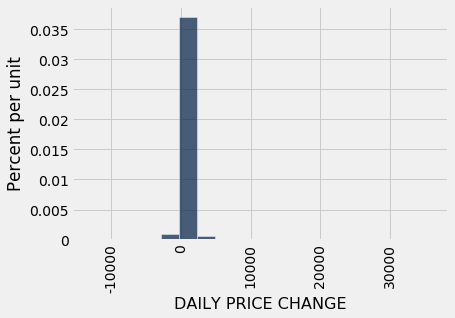

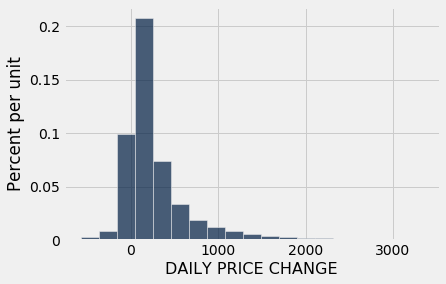

In [39]:
col_stats(condo_sales, COL_DAILY_PRICE_CHANGE)
draw_hist(condo_sales, COL_DAILY_PRICE_CHANGE, 1)

## Looks like there are some significant outliers but most of the data  1%

In [40]:
# strip out the Dailys Price change outliers. 

price_change_diffs = condo_sales.column(COL_DAILY_PRICE_CHANGE)

percent_1 = percentile(1, price_change_diffs)
percent_99 = percentile(99, price_change_diffs)

condo_sales = condo_sales.where(COL_DAILY_PRICE_CHANGE, are.between(percent_1, percent_99))


condo_sales

FULL ADDRESS,FIRST SALE,FIRST PRICE,LAST SALE,LAST PRICE,PRICE CHANGE,PERIOD,DAILY PRICE CHANGE
"300 EAST 55 STREET, 3E",2004-12-22 00:00:00,987702,2005-04-12 00:00:00,1380000,"392,298",111,3534.22
"240 WEST 98TH ST.NY,NY, 13B",2008-03-04 00:00:00,1004529,2009-03-06 00:00:00,2300000,"1,295,471",367,3529.89
"155 FRANKLIN STREET, 4S",2014-09-15 00:00:00,4750000,2015-05-14 00:00:00,5600000,"850,000",241,3526.97
"201 EAST 80TH STREET, 8G",2012-12-21 00:00:00,200000,2016-02-12 00:00:00,4200000,"4,000,000",1148,3484.32
"15 BROAD STREET, 1414",2006-06-16 00:00:00,1071460,2006-11-22 00:00:00,1625000,"553,540",159,3481.38
"250 EAST 53RD STREET, 2901",2008-05-09 00:00:00,2300511,2008-09-16 00:00:00,2750000,"449,489",130,3457.61
"597 BROADWAY, 4W",2004-12-15 00:00:00,2500000,2007-03-22 00:00:00,5350000,"2,850,000",827,3446.19
"225 WEST 60TH STREET, 15B",2013-11-19 00:00:00,1252598,2014-04-25 00:00:00,1790000,"537,402",157,3422.94
"70 LITTLE WEST STREET, 3A",2015-06-24 00:00:00,490000,2015-12-09 00:00:00,1065000,"575,000",168,3422.62
"15 BROAD STREET, 2216",2006-07-18 00:00:00,1097216,2006-11-01 00:00:00,1460000,"362,784",106,3422.49


In [41]:
# Lets cacluclate percentage price change and plot that. 

percents = condo_sales.column(COL_PRICE_CHANGE) / condo_sales.column(COL_FIRST_SALE_PRICE) * 100

COL_PRICE_PERCENT = 'PRICE CHANGE %'

condo_sales = condo_sales.with_column(COL_PRICE_PERCENT, percents)

# strip out the Price Percent change outliers. 

percent_change_diffs = condo_sales.column(COL_PRICE_PERCENT)

percent_1 = percentile(1, percent_change_diffs)
percent_99 = percentile(99, percent_change_diffs)

condo_sales = condo_sales.where(COL_PRICE_PERCENT, are.between(percent_1, percent_99))


condo_sales

FULL ADDRESS,FIRST SALE,FIRST PRICE,LAST SALE,LAST PRICE,PRICE CHANGE,PERIOD,DAILY PRICE CHANGE,PRICE CHANGE %
"300 EAST 55 STREET, 3E",2004-12-22 00:00:00,987702,2005-04-12 00:00:00,1380000,"392,298",111,3534.22,39.7183
"240 WEST 98TH ST.NY,NY, 13B",2008-03-04 00:00:00,1004529,2009-03-06 00:00:00,2300000,"1,295,471",367,3529.89,128.963
"155 FRANKLIN STREET, 4S",2014-09-15 00:00:00,4750000,2015-05-14 00:00:00,5600000,"850,000",241,3526.97,17.8947
"15 BROAD STREET, 1414",2006-06-16 00:00:00,1071460,2006-11-22 00:00:00,1625000,"553,540",159,3481.38,51.6622
"250 EAST 53RD STREET, 2901",2008-05-09 00:00:00,2300511,2008-09-16 00:00:00,2750000,"449,489",130,3457.61,19.5387
"597 BROADWAY, 4W",2004-12-15 00:00:00,2500000,2007-03-22 00:00:00,5350000,"2,850,000",827,3446.19,114
"225 WEST 60TH STREET, 15B",2013-11-19 00:00:00,1252598,2014-04-25 00:00:00,1790000,"537,402",157,3422.94,42.903
"70 LITTLE WEST STREET, 3A",2015-06-24 00:00:00,490000,2015-12-09 00:00:00,1065000,"575,000",168,3422.62,117.347
"15 BROAD STREET, 2216",2006-07-18 00:00:00,1097216,2006-11-01 00:00:00,1460000,"362,784",106,3422.49,33.064
"48 BEACH STREET, 3C",2012-02-22 00:00:00,2687290,2013-03-28 00:00:00,4042819,"1,355,529",400,3388.82,50.4422


# Can we now Predict the Price?

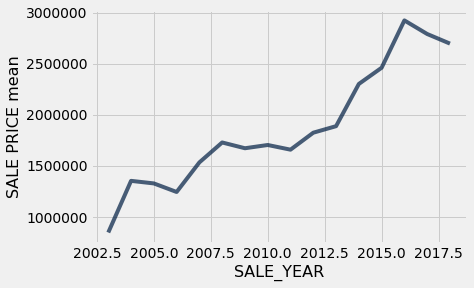

In [42]:
yearly_sales_average = condos.select(COL_SALE_YEAR, COL_SALE_PRICE).group(COL_SALE_YEAR, np.mean).sort(0)
yearly_sales_average.plot(COL_SALE_YEAR)

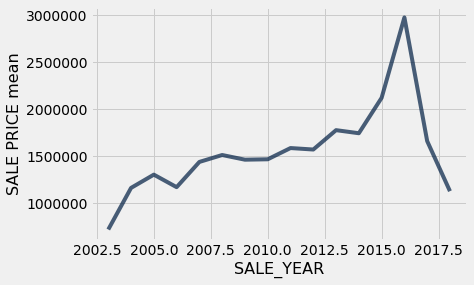

In [43]:
condo_sales.apply(lambda date: date.year, COL_FIRST_SALE_DATE)

first_sales = Table().with_columns(COL_SALE_YEAR, condo_sales.apply(lambda date: date.year, COL_FIRST_SALE_DATE), COL_SALE_PRICE, condo_sales.column(COL_FIRST_SALE_PRICE))

first_sales.group(0, np.mean).plot(COL_SALE_YEAR)
# .select(COL_FIRST_SALE_DATE, COL_FIRST_SALE_PRICE)

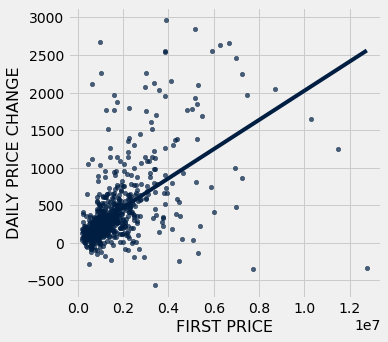

In [44]:
# Let's look at apt from 2010

sales_2010 = condo_sales.where(COL_FIRST_SALE_DATE, are.between( datetime(2010, 1, 1), datetime(2010, 12, 31)))

sales_2010.scatter(COL_FIRST_SALE_PRICE, COL_DAILY_PRICE_CHANGE, fit_line=True)

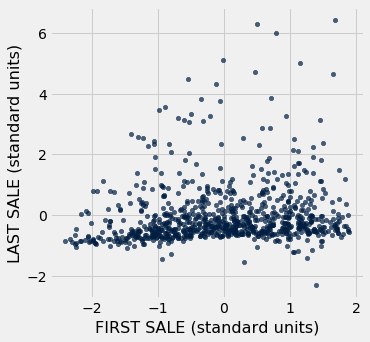

In [45]:
Table().with_columns(
    'FIRST SALE (standard units)',  standard_units(sales_2010.column(COL_PERIOD)), 
    'LAST SALE (standard units)', standard_units(sales_2010.column(COL_PRICE_CHANGE))
).scatter(0, 1)


In [46]:
correlation(sales_2010, COL_FIRST_SALE_PRICE, COL_LAST_SALE_PRICE)

0.957001030530786

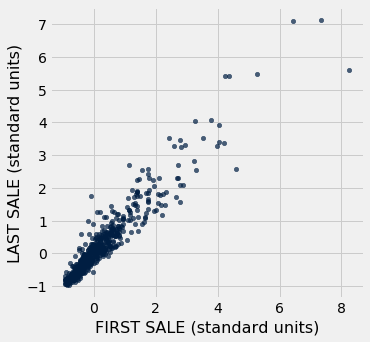

In [47]:
Table().with_columns(
    'FIRST SALE (standard units)',  standard_units(sales_2010.column(COL_FIRST_SALE_PRICE)), 
    'LAST SALE (standard units)', standard_units(sales_2010.column(COL_LAST_SALE_PRICE))
#     'CHANGE %', standard_units(sales_2010.column(COL_PRICE_PERCENT))
).scatter(0)


In [48]:
correlation(sales_2010, COL_FIRST_SALE_PRICE, COL_LAST_SALE_PRICE)

0.957001030530786

In [49]:
def predict_sale_price(first_price):
    """Return a prediction of the sale price
    """
    
    percent5 = first_price * 0.05
    
    close_points = sales_2010.where(COL_FIRST_SALE_PRICE, are.between(first_price-percent5, first_price + percent5))
    
    # Remomve any outliers buy trimming the resutls
    
    last_prices = close_points.column(COL_LAST_SALE_PRICE)
    
    percentile_5 = percentile(5, last_prices)
    percentile_95 = percentile(95, last_prices)
    
    #close_points.show()
    return close_points.where(COL_LAST_SALE_PRICE, are.between_or_equal_to(percentile_5, percentile_95)).column(COL_LAST_SALE_PRICE).mean()   


In [50]:
predict_sale_price(685000)

949517.1379310344

In [51]:
predictions = sales_2010.apply(predict_sale_price, COL_FIRST_SALE_PRICE)

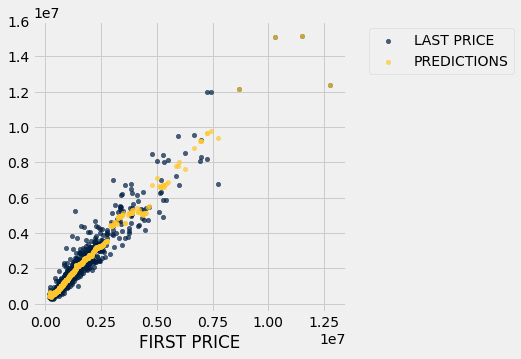

In [52]:
Table().with_columns(
    COL_FIRST_SALE_PRICE,  sales_2010.column(COL_FIRST_SALE_PRICE), 
    COL_LAST_SALE_PRICE, sales_2010.column(COL_LAST_SALE_PRICE), 
    'PREDICTIONS', predictions
).scatter(COL_FIRST_SALE_PRICE)


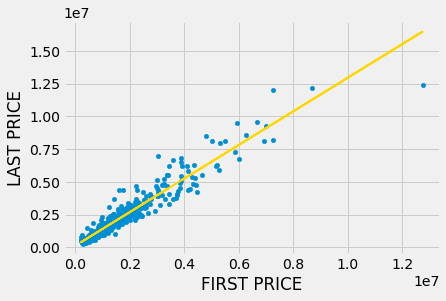

In [76]:
scatter_fit(sales_2010.where(COL_PERIOD, are.between(0*365, 6*365)), COL_FIRST_SALE_PRICE, COL_LAST_SALE_PRICE)

PRICE CHANGE %Stats
Avg: 39.83411248639649 	Std: 45.207818525667015 	Min: -35.916660899166146 	Max: 339.9205316280316
 5%: -7.869657585163316 	95%: 125.83559168925022
 1%: -19.978874422847632 	99%: 223.33333333333334
25%: 11.538461538461538 	50%: 29.76594941487354 	75% 53.81930373100553


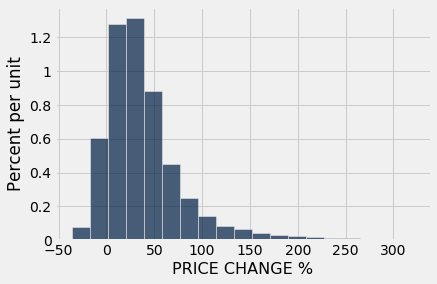

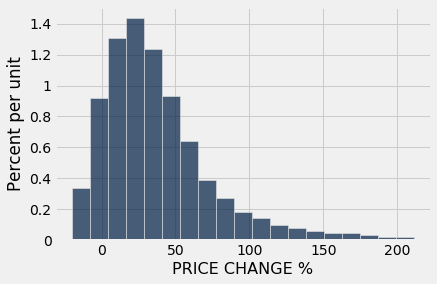

In [54]:


col_stats(condo_sales, COL_PRICE_PERCENT)
draw_hist(condo_sales, COL_PRICE_PERCENT, 1)


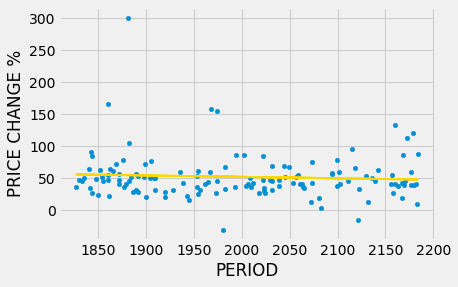

In [79]:
# Table().with_columns(
#     COL_PERIOD,  sales_2010.column(COL_PERIOD), 
#     COL_PRICE_PERCENT, sales_2010.column(COL_PRICE_PERCENT)
# #     'CHANGE %', standard_units(sales_2010.column(COL_PRICE_PERCENT))
# ).scatter(0)

scatter_fit(sales_2010.where(COL_PERIOD, are.between(5*365, 6*365)), COL_PERIOD, COL_PRICE_PERCENT)


In [56]:
sales_2010.where(COL_FIRST_SALE_PRICE, are.between(675000, 695000))


FULL ADDRESS,FIRST SALE,FIRST PRICE,LAST SALE,LAST PRICE,PRICE CHANGE,PERIOD,DAILY PRICE CHANGE,PRICE CHANGE %
"215 AVENUE B, 1005",2010-08-13 00:00:00,690000,2014-07-18 00:00:00,999000,"309,000",1435,215.331,44.7826
"250 EAST 49TH STREET, 10A",2010-11-23 00:00:00,692410,2015-12-22 00:00:00,999999,"307,589",1855,165.816,44.423
"20 PINE STREET, 2413",2010-06-13 00:00:00,687318,2014-04-22 00:00:00,820000,"132,682",1409,94.1675,19.3043
"134 WEST 93RD STREET, 7C",2010-05-10 00:00:00,675000,2017-10-18 00:00:00,910000,"235,000",2718,86.4606,34.8148
"211 EAST 46TH STREET, 7E",2010-05-07 00:00:00,679000,2017-11-14 00:00:00,915000,"236,000",2748,85.8806,34.757
"306 EAST 82ND STREET, 2A",2010-12-09 00:00:00,675000,2016-04-15 00:00:00,840000,"165,000",1954,84.4422,24.4444


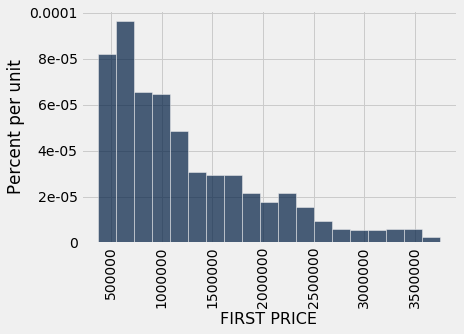

In [57]:
draw_hist(sales_2010, COL_FIRST_SALE_PRICE,5)

In [58]:

first_prices = sales_2010.column(COL_FIRST_SALE_PRICE)

min_price = min(first_prices)
max_price = max(first_prices)

bins = 10
bin_distance = (max_price - min_price) / bins

for i in np.arange(min_price, max_price, bin_distance, ):
    print(i, i+bin_distance)
    #sales_2010.where(COL_FIRST_SALE_PRICE, are.between(i, i+bin_distance)).scatter(COL_PERIOD, COL_PRICE_CHANGE)

190000.0 1446000.0
1446000.0 2702000.0
2702000.0 3958000.0
3958000.0 5214000.0
5214000.0 6470000.0
6470000.0 7726000.0
7726000.0 8982000.0
8982000.0 10238000.0
10238000.0 11494000.0
11494000.0 12750000.0


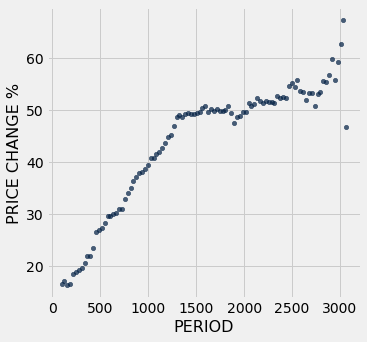

In [69]:
plots.close('all')

periods = sales_2010.column(COL_PERIOD)

min_period = min(periods)
max_period = max(periods)

bins = 5
bin_distance = (max_period - min_period) / bins

period_groups = []
period_sales = []

for i in np.arange(min_period, max_period, 30 ):
#     print(i, i+30)
    period_groups.append(i)
    period_sales.append(np.mean(sales_2010.where(COL_PERIOD, are.between(i, i+bin_distance)).column(COL_PRICE_PERCENT)))
    

Table().with_columns(
    COL_PERIOD,  period_groups, 
    COL_PRICE_PERCENT, period_sales
#     'CHANGE %', standard_units(sales_2010.column(COL_PRICE_PERCENT))
).scatter(0)

NameError: name 'interact' is not defined